<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/2_LM_Multiple_Regression_one_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Library and Data :

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.linear_model import LinearRegression

In [69]:
startup= pd.read_csv("https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/startup.csv", index_col=0)
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04


<Axes: xlabel='Marketing Spend', ylabel='Profit'>

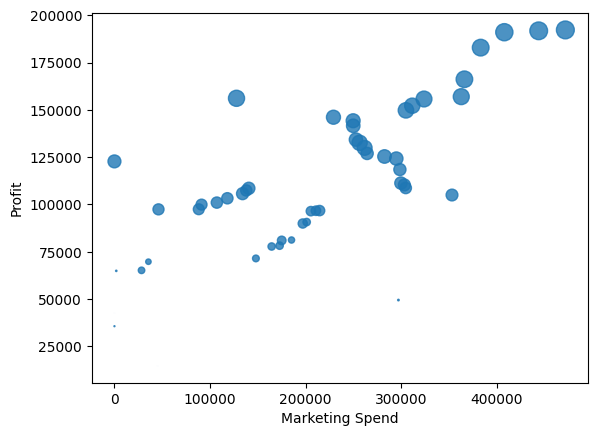

In [70]:
from matplotlib import pyplot as plt
startup.plot(kind='scatter', x='Marketing Spend', y='Profit', s=startup['R&D Spend']/1000, alpha=.8)

## 2 Check Data

In [71]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.715600,121344.739600,211025.197800,112012.739200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.100000,51283.240000,0.100000,14681.500000
25%,39936.470000,103730.975000,129300.232500,90139.002500
50%,73051.180000,122699.895000,212716.340000,107978.290000
75%,101602.900000,144842.280000,299469.185000,139766.077500
max,165349.300000,182645.660000,471784.200000,192261.930000


In [72]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


## 3 Preprocessing :
 - 1) one-hot encoding (cf. dummy variable)  
 - 2) train/test split

In [73]:
startup.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49


In [74]:
# One-hot encode on state column and save the data as startup_encoded
import pandas as pd
startup_encoded = pd.get_dummies(startup, columns=['State'])


In [75]:
startup_encoded.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.3,136897.90,471784.20,192261.93,False,False,True
1,162597.8,151377.69,443898.63,191792.16,True,False,False


In [76]:
startup_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     bool   
 5   State_Florida     50 non-null     bool   
 6   State_New York    50 non-null     bool   
dtypes: bool(3), float64(4)
memory usage: 2.1 KB


In [77]:
startup_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [78]:
startup_encoded.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.30,136897.90,471784.20,192261.93,False,False,True
1,162597.80,151377.69,443898.63,191792.16,True,False,False
2,153441.61,101145.65,407934.64,191050.49,False,True,False


In [79]:
startup_encoded.columns !='Profit'

array([ True,  True,  True, False,  True,  True,  True])

In [80]:
# what does this code do?
X=startup_encoded.loc[:, startup_encoded.columns!='Profit']
y=startup_encoded['Profit']

In [81]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.3,136897.90,471784.20,False,False,True
1,162597.8,151377.69,443898.63,True,False,False


In [82]:
y.head(2)

0    192261.93
1    191792.16
Name: Profit, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# how much percent of data is being using for training?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## 4 Modeling

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()

In [87]:
model.fit(X_train, y_train)

LinearRegression()

In [88]:
model_1 = LinearRegression(fit_intercept=False)

In [89]:
model_1.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

Note: In this example, we took only machine learning approach aiming for predictive performance.
For interpretability and coefficient estimation in linear models, we must omit one dummy to avoid multicorelinarity;
For predictive performance in models, including all dummies, as we do here, might be acceptable.

## 5 Prediction

In [90]:
pred = model.predict(X_test)
pred

array([103015.30159796, 132582.37760816, 132447.83845174,  71976.19851258,
       178537.58221055, 116161.34230165,  67851.79209676,  98791.83374687,
       113969.53533012, 167921.1656955 ])

In [91]:
pred_1= model_1.predict(X_test)
pred_1

array([103015.30159771, 132582.37760828, 132447.83845182,  71976.19851247,
       178537.58221086, 116161.3423016 ,  67851.79209668,  98791.83374668,
       113969.53533009, 167921.16569579])

## 6 Evaluating the model

In [92]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [93]:
comparison_1 = pd.DataFrame({'actual': y_test, 'pred': pred_1})

In [94]:
comparison_1

,actual,pred
28,103282.48,103015.301598
11,144259.50,132582.377608
10,146122.05,132447.838452
41,77798.93,71976.198512
2,191050.49,178537.582211
27,105008.41,116161.342302
38,81229.16,67851.792097
31,97483.66,98791.833747
22,110352.35,113969.535330
4,166188.04,167921.165696


In [95]:
comparison

,actual,pred
28,103282.48,103015.301598
11,144259.50,132582.377608
10,146122.05,132447.838452
41,77798.93,71976.198513
2,191050.49,178537.582211
27,105008.41,116161.342302
38,81229.16,67851.792097
31,97483.66,98791.833747
22,110352.35,113969.535330
4,166188.04,167921.165696


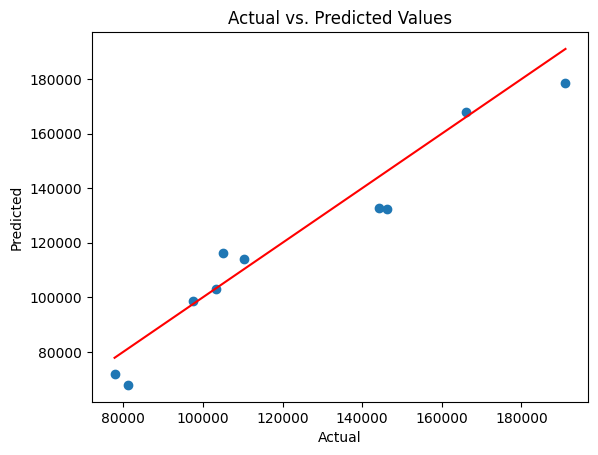

In [96]:
# Compare actual v. predicted with line vs. scatter comparsion

# Plot the actual and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")

# Add a line for the perfect fit
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")

# Show the plot
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error


In [46]:
mse=mean_squared_error(y_test, pred)  #mean squared error
mse

52640097.52833954

In [59]:
mse_1=mean_squared_error(y_test, pred_1)  #mean squared error
mse_1

52640097.528339714

In [47]:
rmse= mse ** 0.5   #root mean squared error
rmse

7255.349580022974

In [60]:
rmse_1= mse_1 ** 0.5   #root mean squared error
rmse_1

7255.349580022986

In [48]:
model.score(X_train, y_train) # r-squared on train set

0.9576940553228058

In [61]:
model_1.score(X_train, y_train) # r-squared on train set

0.9576940553228058

In [49]:
model.score(X_test, y_test) # r-squared on test set  : 1) which r-squared is more important? 2) are they the same as statmodels' r-squared?

0.9588392809708518

In [62]:
model_1.score(X_test, y_test) # r-squared on test set  : 1) which r-squared is more important? 2) are they the same as statmodels' r-squared?

0.9588392809708517

In [64]:
model_1.coef_

array([-1.26402047e+03,  4.03214028e-01,  1.08226725e-02,  2.77240036e-02,
        1.05815679e+05,  1.04323638e+05,  1.06149099e+05])

In [65]:
model.coef_

array([-1.26402047e+03,  4.03214028e-01,  1.08226725e-02,  2.77240036e-02,
        3.86206789e+02, -1.10583415e+03,  7.19627357e+02])

In [68]:
X_test.columns

Index(['Unnamed: 0', 'R&D Spend', 'Administration', 'Marketing Spend',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

---